# MODEL TRAINING
---
### 1.1 IMPORTING DATA AND REQUIRED PACKAGES

In [1]:
#Basic library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Modelling and evaluation library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
import warnings

### 1.2 DATA

In [7]:
df=pd.read_csv('data/stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### 1.3 PROBLEM STATEMENT
- The problem statement is to predict the math score based on other features hence math score is my output variable while other
  features are my input variable.

In [29]:
X=df.drop('math_score',axis=1)

In [30]:
y=df['math_score']

In [31]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [32]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### 1.3 ONEHOT ENCODING AND STANDARDIZATION.

- Lets separate out the categorical and numerical columns

In [33]:
num_features=[i for i in X.columns.values if df[i].dtype!='O']
cat_features=[i for i in X.columns.values if df[i].dtype=='O']

In [34]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([
    ('One_hot_encoding',oh_transformer,cat_features),
    ('standardization',num_transformer,num_features)
])

In [35]:
X=preprocessor.fit_transform(X)

In [36]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [37]:
X.shape

(1000, 19)

### 1.4 TRAIN TEST SPLIT

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(800, 19)

In [42]:
X_test.shape

(200, 19)

### 1.5 CREATING AN EVALUATION MATRICS
- As this is a regression problem we will try to build the evaluation matrics

In [46]:
def evaluate_model(true,prediction):
    mae=mean_absolute_error(true,prediction)
    mse=mean_squared_error(true,prediction)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,prediction)
    return mae,rmse,r2_square

### 1.5 MODELS 


- We will try to run many different models and check their model performences

In [58]:
models={'Linear regression':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'K nearest neighbour':KNeighborsRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'Random Forest Regressor':RandomForestRegressor(),
        'Cat boost regressor':CatBoostRegressor(verbose=False),
        'AdaBoostRegressor':AdaBoostRegressor()
        }
#These are the models we are going to try and evaluate.

In [69]:
model_list=[]
r2_list=[]
rmse_list=[]

for i in range(len(list(models.keys()))):
    #model fitting
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    #Evaluation
    model_train_mae,model_train_rmse,model_train_r2_score=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2_score=evaluate_model(y_test,y_test_pred)

    #Model r2 score and Rmse saving
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2_score)
    rmse_list.append(model_test_rmse)

    #Reporting
    print(list(models.keys())[i])
    print("-"*35)
    print('Model performance on training set')
    print('-'*35)
    print(f'Root mean square error : {model_train_rmse:.2f}')
    print(f'Mean absolute error : {model_train_mae:.2f}')
    print(f'R2 score : {model_train_r2_score:.2f}')
    print("-"*35)
    print('Model performance on test set')
    print('-'*35)
    print(f'Root mean square error : {model_test_rmse:.2f}')
    print(f'Mean absolute error : {model_test_mae:.2f}')
    print(f'R2 score : {model_test_r2_score:.2f}')
    print("="*35)
    print('\n')




Linear regression
-----------------------------------
Model performance on training set
-----------------------------------
Root mean square error : 5.34
Mean absolute error : 4.27
R2 score : 0.87
-----------------------------------
Model performance on test set
-----------------------------------
Root mean square error : 5.42
Mean absolute error : 4.23
R2 score : 0.88


Lasso
-----------------------------------
Model performance on training set
-----------------------------------
Root mean square error : 6.59
Mean absolute error : 5.21
R2 score : 0.81
-----------------------------------
Model performance on test set
-----------------------------------
Root mean square error : 6.52
Mean absolute error : 5.16
R2 score : 0.83


Ridge
-----------------------------------
Model performance on training set
-----------------------------------
Root mean square error : 5.32
Mean absolute error : 4.26
R2 score : 0.87
-----------------------------------
Model performance on test set
-------------

In [79]:
pd.DataFrame(list(zip(model_list,r2_list,rmse_list)),columns=['Models','R2 score','Rmse score']).sort_values(by='R2 score',
                                                                                                             ascending=False)

,Models,R2 score,Rmse score
2,Ridge,0.880593,5.390387
0,Linear regression,0.879216,5.421372
5,Random Forest Regressor,0.854383,5.952673
6,Cat boost regressor,0.851632,6.008632
7,AdaBoostRegressor,0.839759,6.244425
1,Lasso,0.825320,6.519695
3,K nearest neighbour,0.783813,7.253041
4,DecisionTreeRegressor,0.749135,7.813130


In [80]:
#Here we can see that the Linear regression and Ridge regression performs the best on the given dataset.

### 1.6 LINEAR REGRESSION

In [82]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

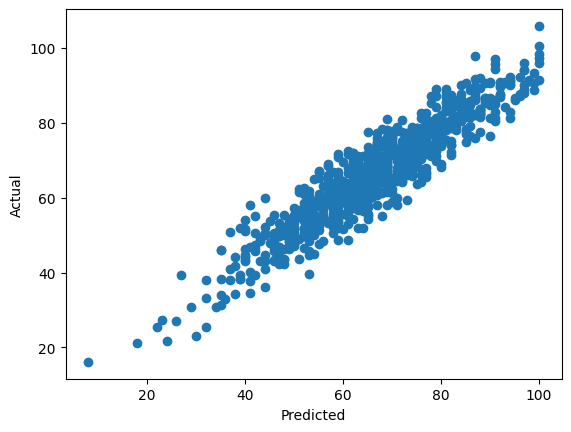

In [89]:
plt.scatter(y_train,y_train_predict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()